This notebook is used to create graphs from training logs from ml-agents.

In [2]:
import re
import matplotlib.pyplot as plt

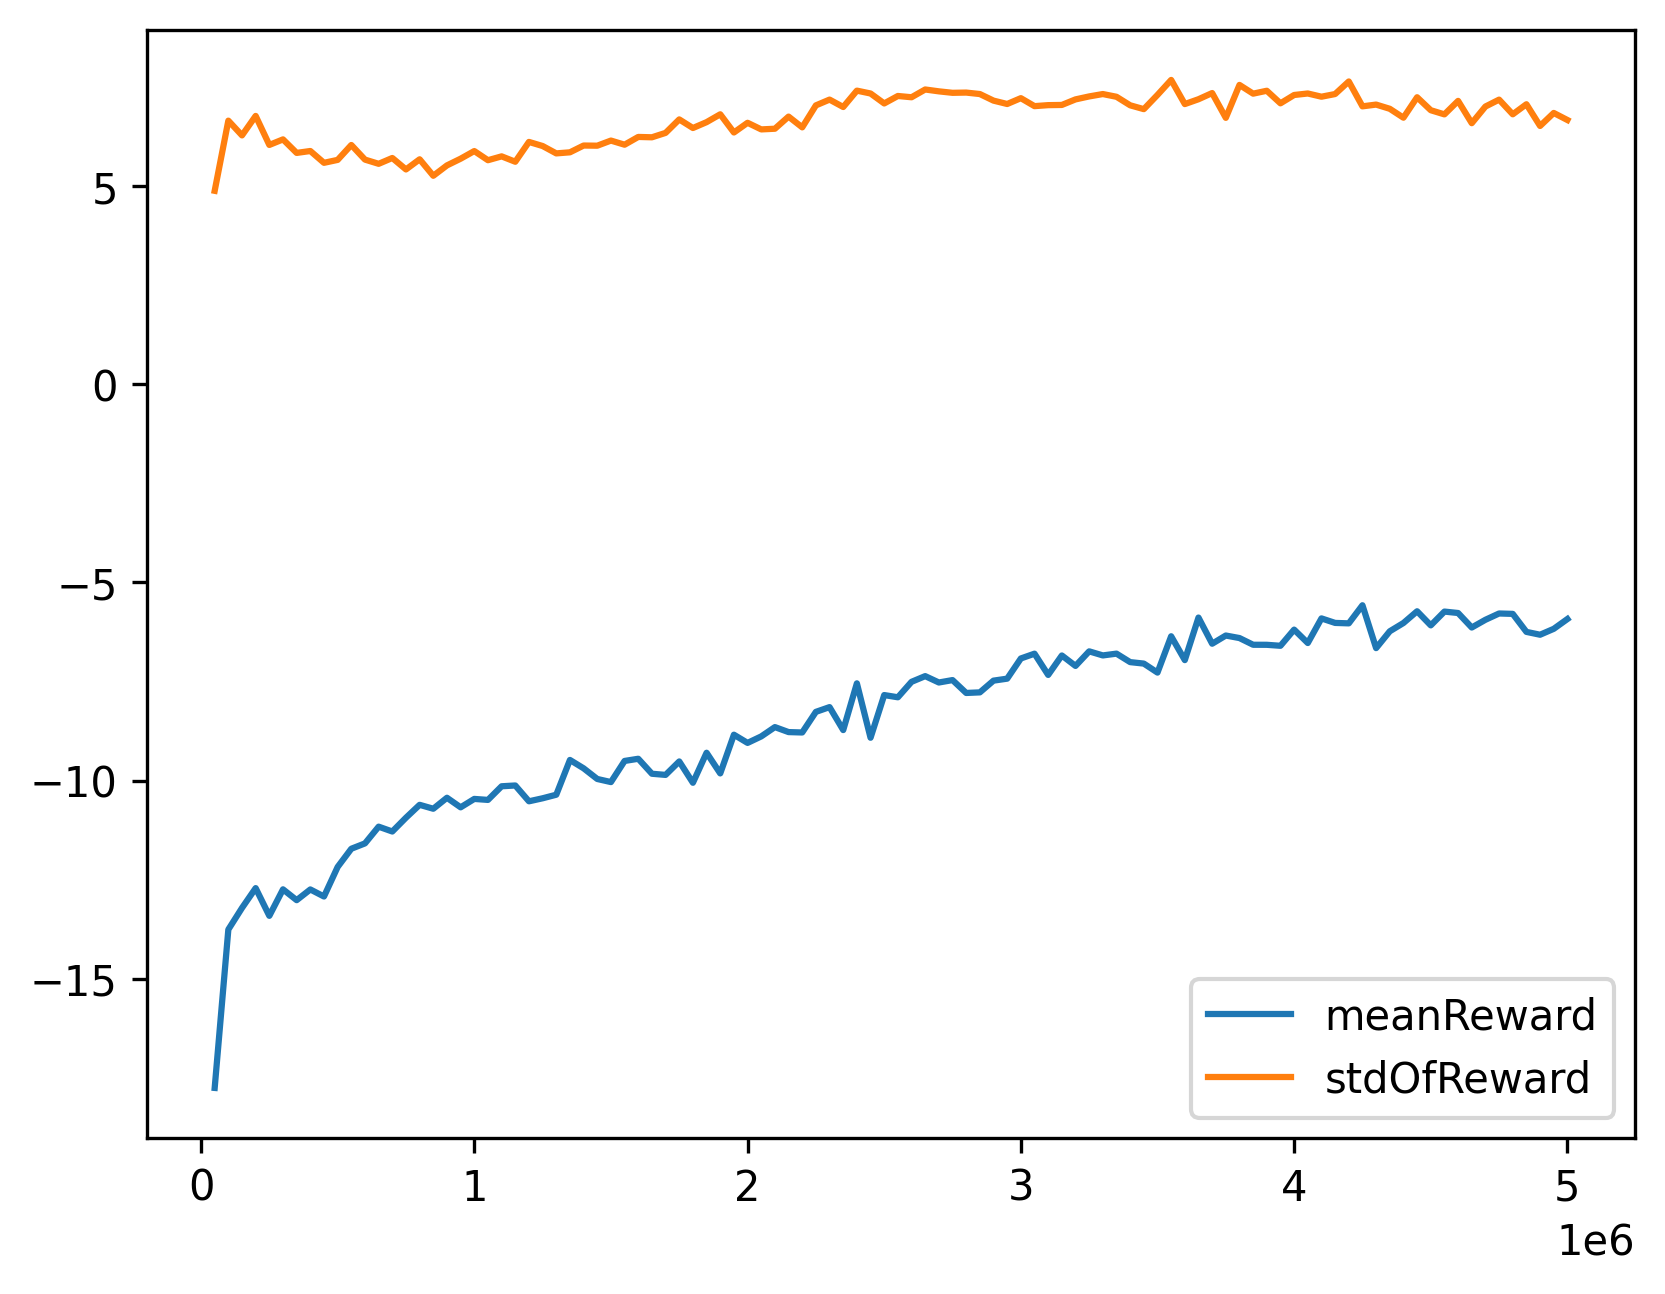

In [9]:
pathToLog = r"c:\Users\martin\Josh2DEndlessShooter\results\Shooter14\log.txt"

# Get the contents of the log file
with open(pathToLog, "r") as f:
    log = f.readlines()

# Get the values from the log
allLineValues = []
for line in log:
    if line.startswith("[INFO] AgentsBehavior."):
        #print(line)
        currentValues = re.findall(r'[+-]?\d+(?:\.\d+)?', line)
        if len(currentValues) != 4:
            print("Error in finding values")
            break
        allLineValues.append(currentValues)
#print(allLineValues)
# [[a, b, c], [1, 2, 3], [m, n, o]]
#print(list(map(list, zip(*allLineValues))))
# [[a, 1, m], [b, 2, n], [c, 3, o]]
[stepValues, timeElapsedValues, meanRewardValues, stdOfRewardValues] = list(map(list, zip(*allLineValues)))

stepValues = [int(x) for x in stepValues]
timeElapsedValues = [float(x) for x in timeElapsedValues]
meanRewardValues = [float(x) for x in meanRewardValues]
stdOfRewardValues = [float(x) for x in stdOfRewardValues]

# Create the plot
#fig, ax = plt.subplots(1, figsize = (12, 8))
#ax.grid()
#plt.xticks(rotation = 75)
plt.figure(dpi=300)
plt.plot(stepValues, meanRewardValues, label = "meanReward")
plt.plot(stepValues, stdOfRewardValues, label = "stdOfReward")
#plt.plot(stepValues, timeElapsedValues, label = "timeElapsedValues")
plt.legend()
plt.savefig('Shooter14.png')
plt.show()